In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from scipy import interpolate
import matplotlib.image as mpimg 
import cv2

In [5]:
%matplotlib inline 

In [6]:
plt.style.use('dark_background')

In [7]:
path = r'C:\Users\Ron\Desktop\Physics stuff\AY 2022-2023\AP157\low contrast pics'
file1 = '\yutaka takanashi towards the city.jpg' 
file2 = '\mr incredible.jfif'

In [23]:
def normalizer(array, vmin = 0, vmax = 255): 
    max_val, min_val = np.max(array), np.min(array)
    result = (array-min_val)*(255/(max_val-min_val))
    return np.array(result, dtype='uint8')

def PDF(img):
    size = np.shape(img)
    pix = size[0]*size[1]
    hist = np.histogram(img.flatten(), bins=256)[0]
    pdf_normed = np.histogram(img, bins = 256)[0]/pix 
    return pdf_normed

def CDF(img):
    return np.cumsum(PDF(img))

def backproject(img, desiredCDF):
    xvals = np.linspace(0,1,len(desiredCDF))
    f= interpolate.interp1d(desiredCDF, xvals, fill_value='extrapolate') 
    xnew = normalizer(f(cdf_normed(img)))
    new_img = np.array(xnew[img], dtype='uint8')
    return new_img

def linear(N=1000):
    xvals = np.linspace(0,1,N)
    return xvals/255 

def sigmoid(N=1000, a=20):
    xvals = np.linspace(0,1,N)
    desiredCDF_sigmoid = 1/(1+np.exp(-a*(xvals - 1/2))) 
    return desiredCDF_sigmoid 



In [9]:
img1 = cv2.imread(path+file1, 0)
img2=cv2.imread(path+file2, 0)

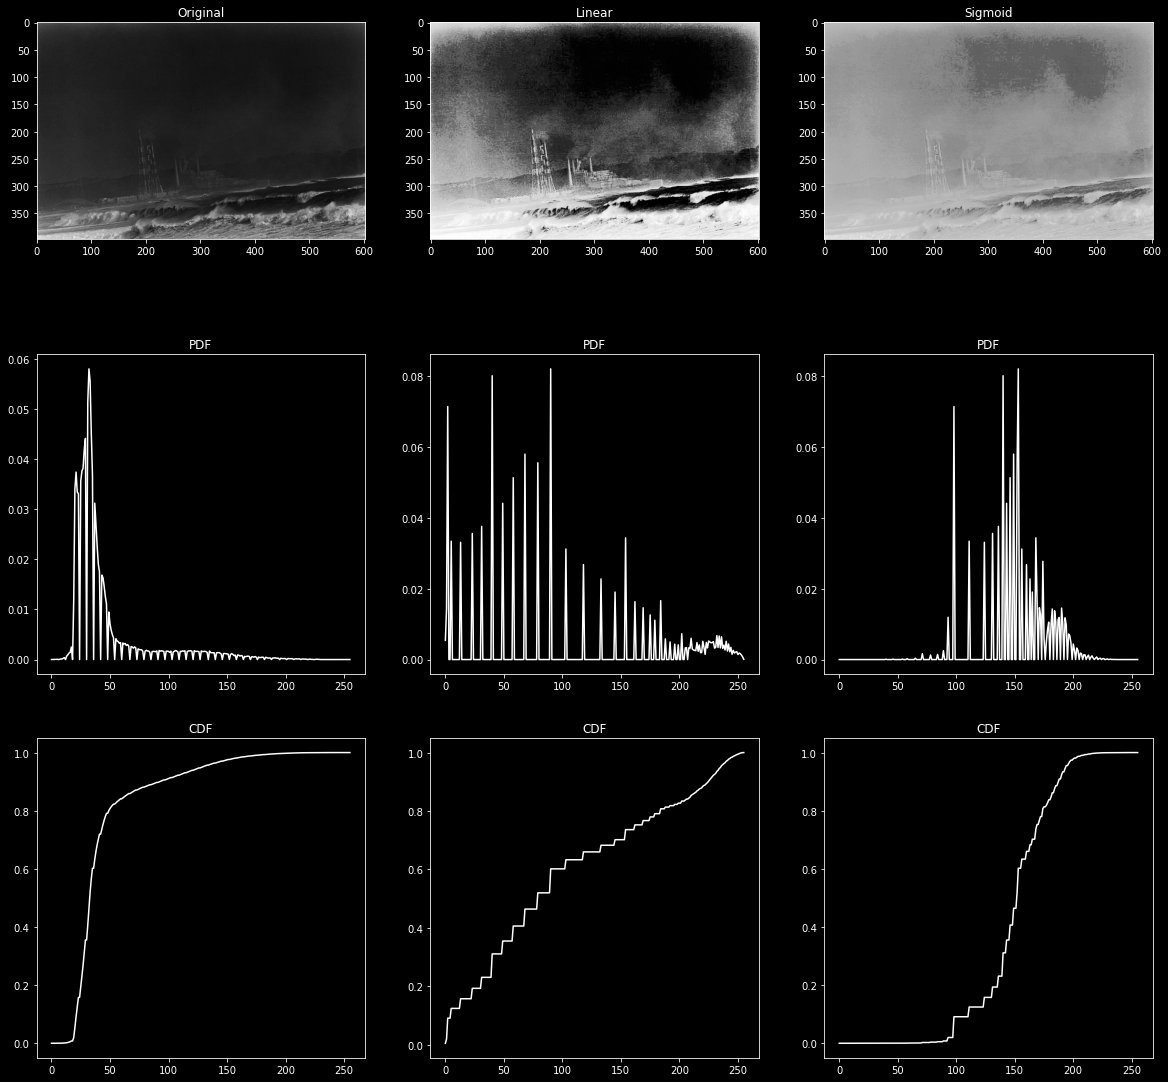

In [29]:
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax=ax.flatten()
img1_linear = backproject(img1, linear()) 
img1_sigmoid = backproject(img1, sigmoid(a=30))
images = [img1, img1_linear, img1_sigmoid]
for i in range(3): 
    ax[i].imshow(images[i], cmap='gray')
    ax[i+3].plot(PDF(images[i]), c='w') 
    ax[i+3].set_title('PDF') 
    ax[i+6].plot(CDF(images[i]), c='w') 
    ax[i+6].set_title('CDF') 
ax[0].set_title('Original')
ax[1].set_title('Linear') 
ax[2].set_title('Sigmoid')
plt.savefig('hist_backproject1.png', dpi=300)

Text(0.5, 1.0, 'Sigmoid')

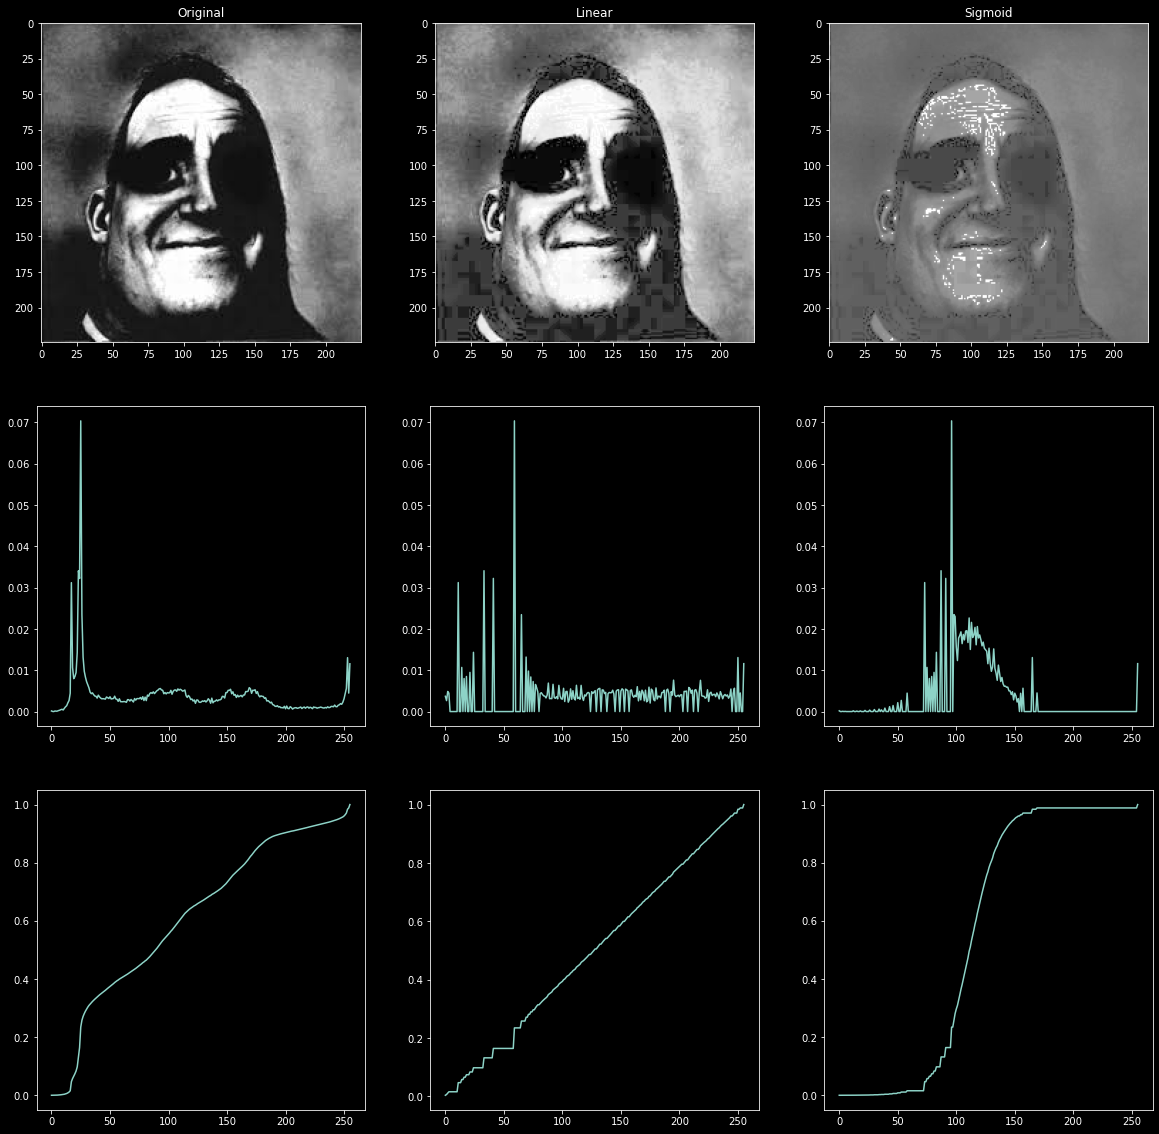

In [39]:
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax=ax.flatten()
img2_linear = backproject(img2, linear()) 
img2_sigmoid = backproject(img2, sigmoid(a=20))
images2 = [img2, img2_linear, img2_sigmoid]
for i in range(3): 
    ax[i].imshow(images2[i], cmap='gray')
    ax[i+3].plot(PDF(images2[i])) 
    ax[i+6].plot(CDF(images2[i]))
ax[0].set_title('Original')
ax[1].set_title('Linear') 
ax[2].set_title('Sigmoid')

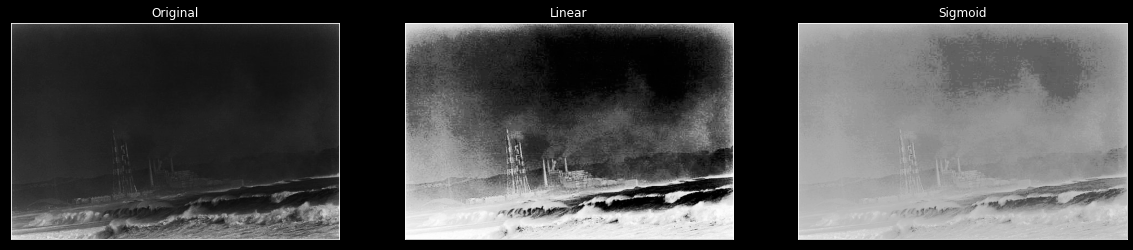

In [34]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax=ax.flatten()
for i in range(3): 
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[0].set_title('Original')
ax[1].set_title('Linear') 
ax[2].set_title('Sigmoid') 
plt.savefig('hist_backproject1.png', dpi=300)  

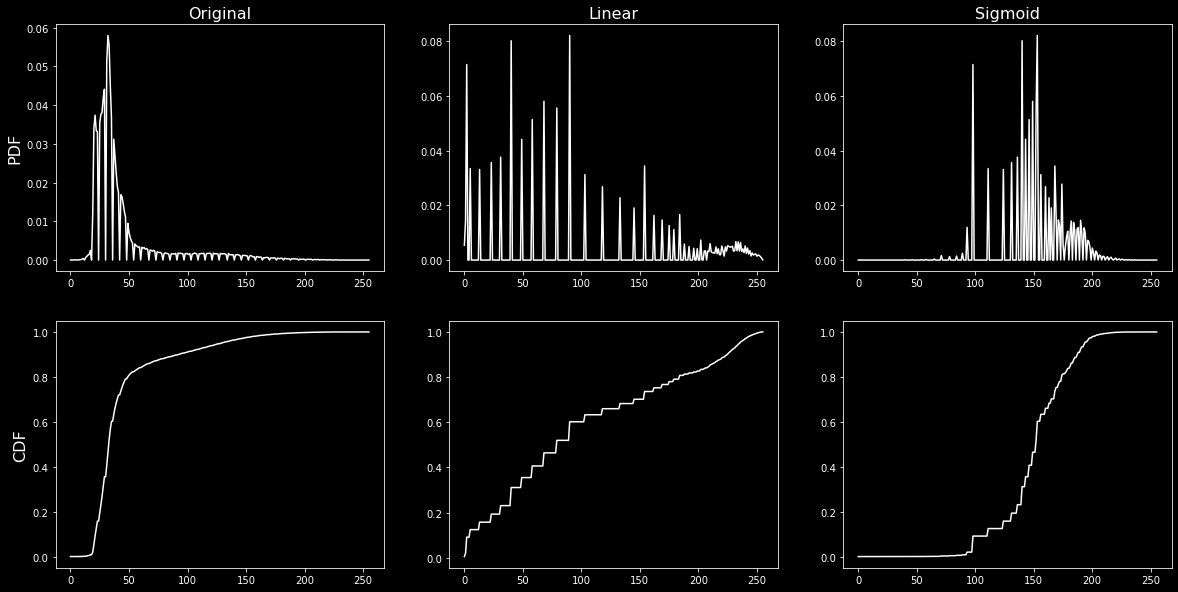

In [37]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax=ax.flatten() 
for i in range(3): 
    ax[i].plot(PDF(images[i]), c='w')  
    ax[i+3].plot(CDF(images[i]), c='w') 
ax[0].set_title('Original', fontsize=16)
ax[1].set_title('Linear', fontsize=16) 
ax[2].set_title('Sigmoid', fontsize=16)
ax[0].set_ylabel('PDF', fontsize=16) 
ax[3].set_ylabel('CDF', fontsize=16)
plt.savefig('hist_backproject1a.png', dpi=300)  



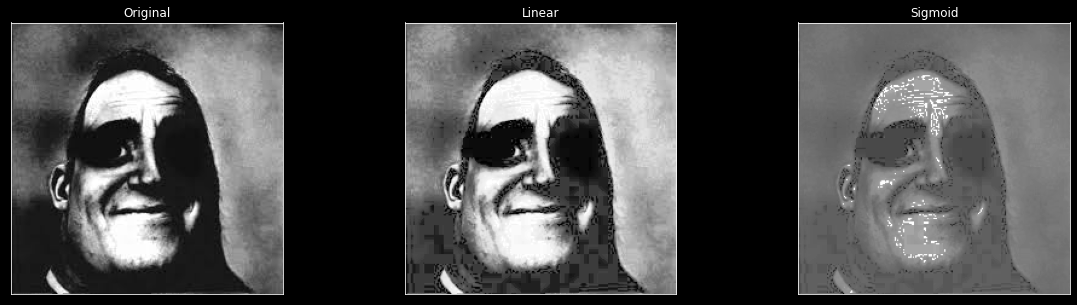

In [40]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax=ax.flatten()
for i in range(3): 
    ax[i].imshow(images2[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[0].set_title('Original')
ax[1].set_title('Linear') 
ax[2].set_title('Sigmoid') 
plt.savefig('hist_backproject1.png', dpi=300)  

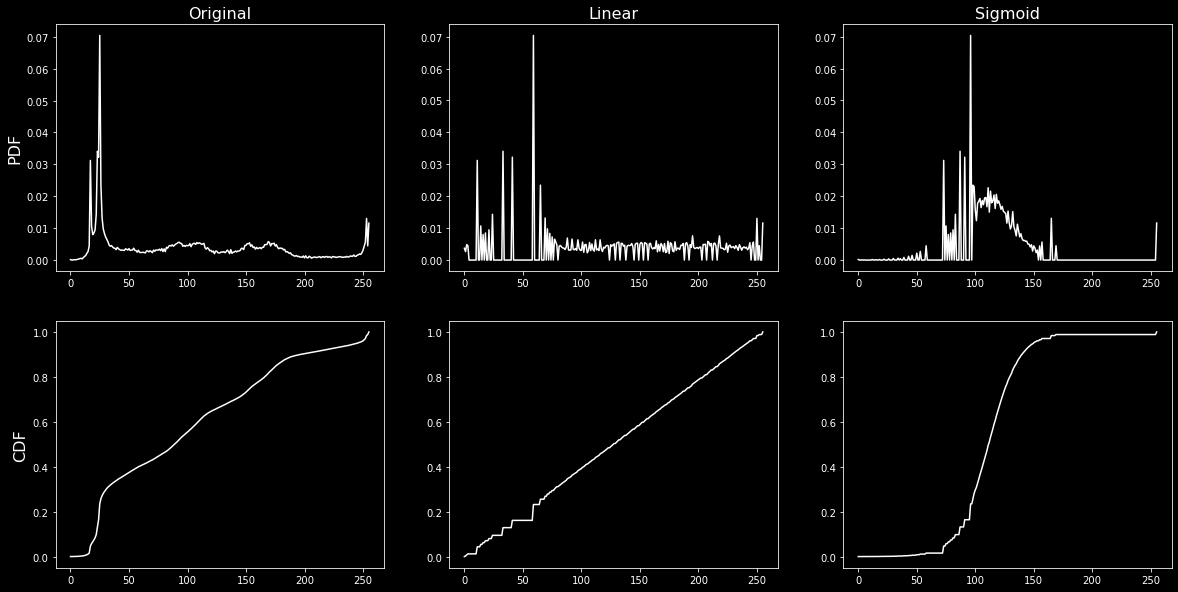

In [41]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax=ax.flatten() 
for i in range(3): 
    ax[i].plot(PDF(images2[i]), c='w')  
    ax[i+3].plot(CDF(images2[i]), c='w') 
ax[0].set_title('Original', fontsize=16)
ax[1].set_title('Linear', fontsize=16) 
ax[2].set_title('Sigmoid', fontsize=16)
ax[0].set_ylabel('PDF', fontsize=16) 
ax[3].set_ylabel('CDF', fontsize=16)
plt.savefig('hist_backproject1a.png', dpi=300)  


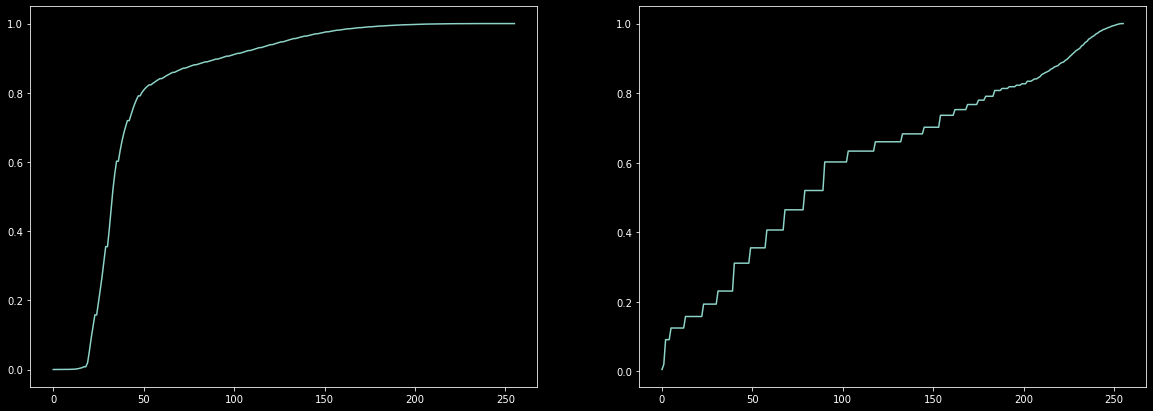

In [45]:
fig, ax = plt.subplots(1,2, figsize=(20,7)) 
ax=ax.flatten() 
ax[0].plot(CDF(images[0]))
ax[1].plot(CDF(images[1]))
plt.savefig('comparison.png', dpi=300)